# 📘 Exploratory Data Analysis
**Bias in AI-Driven Housing Price Predictions: A Case Study of the New York Metropolitan Area.**

This notebook contains the data wrangling and visualization work for Part 2 of the project.

---

## 🧾 Codebook

This dataset contains information about variables we are using.

| Variable Name | Description | Data Type | Possible Values / Range | Notes |
|---------------|-------------|-----------|--------------------------|-------|
| `Median Prices (6/30/2021)` | Core Data's most recent Housing Prices | Float | 0–33 | Listed in 100,000s |
| `Median Prices (2/28/2025)` | Zillow's most recent Housing Prices | Float | 0-34 | Listed in 100,000s |
| `airbnb_nyc_original` | Original New York AirBnb Dataset | DataSet | - | - |
| `airbnb_nyc` | Edited New York City AirBnb Dataset | DataSet | - | - |
| `home_nyc` | Edited NYC AirBnb dataset of with only entire houses/apt | Dataset | - | - |
| `nyc_dem` | CoreData NYC Neighboorhoods Dataset | Dataset | - | - |
| `zillow_values` | Zillow NYC Home Value | Dataset | - | - |


#### Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm
from matplotlib.ticker import FuncFormatter
import seaborn as sns

!pip install fairlearn
import fairlearn
!pip install aif360
import aif360

# suppress warnings
pd.options.mode.chained_assignment = None
pd.options.mode.copy_on_write = True

## 🧹 Data Cleaning and Wrangling

Cleaning steps taken:
- Renamed columns for clarity
- Converted date columns to datetime
- Removed rows with missing values in critical columns
- Created new calculated fields


## 🧹 Detailed Data Cleaning Notes

### What data cleaning did we do?

- **Handling Missing Values**:  
  In the initial datasets, there were rentals that did not have prices listed. We chose to remove those rows since they did not make up a large percentage of the data (about 15%) and we were planning to focus on only 10 out of the 200 neighborhoods listed.

- **Standardization & Normalization**:  
  Some of the monetary values were in scientific notation while others were not. We changed all of the monetary values to standard USD. This included dividing by appropriate factors (like 100,000) to normalize values across datasets.

- **Excluding Data**:  
  We used three different datasets from separate sources. Each one categorized information by New York City neighborhoods, but not all used the same neighborhood names or included the same areas. We chose ten neighborhoods that all three datasets had in common. These neighborhoods represent all five boroughs and were selected to show diversity in racial composition (especially white and Black resident percentages).

- **Creating Variables**:  
  We did not have to create any new variables during cleaning. We relied on existing columns such as price, race percentages, and neighborhood names.

### How did we prepare the data?

- Cleaned and standardized column names (e.g., lowercase, replacing spaces with underscores).
- Condensed datasets by keeping only the columns needed for visualizations and comparisons.
- Renamed columns where necessary to improve clarity and readability.


### AirBnb Cleaning

In [ ]:
# Load the Airbnb data
airbnb_nyc = pd.read_csv('Airbnb NYC listings (original).csv')
airbnb_nyc_original = airbnb_nyc
airbnb_nyc

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle Sanctuary,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240.0,30,49,2022-06-21,0.27,3,365,0,NaN
1,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70935,-73.95342,Entire home/apt,81.0,30,195,2024-10-05,1.03,1,196,4,NaN
2,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,Kahshanna,Manhattan,East Harlem,40.80107,-73.94255,Private room,65.0,30,1,2022-06-05,0.03,2,83,0,NaN
3,6990,UES Beautiful Blue Room,16800,Cyn,Manhattan,East Harlem,40.78778,-73.94759,Private room,70.0,30,251,2024-12-01,1.36,1,8,5,NaN
4,7064,"Amazing location! Wburg. Large, bright & tranquil",17297,Joelle,Brooklyn,Williamsburg,40.71248,-73.95881,Private room,NaN,30,13,2022-09-12,0.07,2,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37779,1322024128476576885,"The Gem of Riverdale, NYC!",35391290,Oscar,Bronx,Kingsbridge,40.88178,-73.89973,Entire home/apt,159.0,30,0,NaN,NaN,3,365,0,NaN
37780,1322305006441883773,Amazing 1BR & 1BTH,504878421,Karan,Manhattan,Financial District,40.70610,-74.00666,Entire home/apt,199.0,30,0,NaN,NaN,3,306,0,NaN
37781,1322523395081457963,Home Share w/ Young Professionals - 2/3/4/5 Tr...,2822805,Olivier,Brooklyn,Crown Heights,40.67013,-73.95874,Private room,99.0,30,0,NaN,NaN,21,65,0,NaN
37782,1322561224337225530,Bedroom for rent in two bedroom UWS apartment,666385153,Kiana Elizabeth,Manhattan,Upper West Side,40.79655,-73.97462,Private room,131.0,30,0,NaN,NaN,1,83,0,NaN


In [ ]:
# Removing unnecessary columns (columns not important to our data)
columns_to_keep = airbnb_nyc.columns[[0, 4, 5, 6, 7, 8, 9]].to_list()
airbnb_nyc = airbnb_nyc[columns_to_keep]
airbnb_nyc

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price
0,2595,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240.0
1,6848,Brooklyn,Williamsburg,40.70935,-73.95342,Entire home/apt,81.0
2,6872,Manhattan,East Harlem,40.80107,-73.94255,Private room,65.0
3,6990,Manhattan,East Harlem,40.78778,-73.94759,Private room,70.0
4,7064,Brooklyn,Williamsburg,40.71248,-73.95881,Private room,NaN
...,...,...,...,...,...,...,...
37779,1322024128476576885,Bronx,Kingsbridge,40.88178,-73.89973,Entire home/apt,159.0
37780,1322305006441883773,Manhattan,Financial District,40.70610,-74.00666,Entire home/apt,199.0
37781,1322523395081457963,Brooklyn,Crown Heights,40.67013,-73.95874,Private room,99.0
37782,1322561224337225530,Manhattan,Upper West Side,40.79655,-73.97462,Private room,131.0


#### Cleaning Step: Dropping Missing Values

We remove any listings that do not include a price to ensure our analysis reflects actual Airbnb costs. This helps avoid skewed or misleading results when visualizing price distributions or comparing neighborhoods.


In [ ]:
# Removing columns with missing price data
airbnb_nyc.dropna(subset = ['price'], inplace= True)
airbnb_nyc

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price
0,2595,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240.0
1,6848,Brooklyn,Williamsburg,40.70935,-73.95342,Entire home/apt,81.0
2,6872,Manhattan,East Harlem,40.80107,-73.94255,Private room,65.0
3,6990,Manhattan,East Harlem,40.78778,-73.94759,Private room,70.0
5,7097,Brooklyn,Fort Greene,40.69194,-73.97389,Private room,205.0
...,...,...,...,...,...,...,...
37779,1322024128476576885,Bronx,Kingsbridge,40.88178,-73.89973,Entire home/apt,159.0
37780,1322305006441883773,Manhattan,Financial District,40.70610,-74.00666,Entire home/apt,199.0
37781,1322523395081457963,Brooklyn,Crown Heights,40.67013,-73.95874,Private room,99.0
37782,1322561224337225530,Manhattan,Upper West Side,40.79655,-73.97462,Private room,131.0


#### Focused Dataset: Entire Homes/Apartments

To maintain consistency and control for differences in accommodation type, we filtered our dataset to include only listings for entire homes/apartments — the most commonly booked type for travelers seeking privacy and amenities.


In [ ]:
# Creating dataset with only Entire home/apt rental airbnbs
home_nyc = airbnb_nyc.loc[airbnb_nyc['room_type'] == 'Entire home/apt']
# Narrow down the dataset to selected neighborhoods
home_nyc = home_nyc.loc[home_nyc['neighbourhood'].isin(['Upper East Side', 'East Harlem', 'Jamaica', 'Bushwick', 'Astoria', 'Queens Village', 'Williamsbridge', 'Williamsburg', 'Flatlands', 'Bay Ridge'])]

In [ ]:
airbnb_nyc = airbnb_nyc.loc[airbnb_nyc['neighbourhood'].isin(['Financial District', 'East Harlem', 'Jamaica', 'Stuyvesant Town', 'Astoria', 'Forest Hills', 'Riverdale', 'Greenpoint', 'Canarsie', 'Bay Ridge'])]

### Demographic Data Preparation

We load demographic data from CoreData NYC, filter for the year 2021, and select sub-borough areas that match our Airbnb data. This allows us to compare racial composition with Airbnb prices and housing trends.

In [ ]:
# Load Coredata
nyc_dem = pd.read_csv('CoreData NYC Neighboorhoods (original) .csv')

In [ ]:
# Keep relevant columns and filter
nyc_dem = nyc_dem[['region_id', 'region_name', 'region_type', 'year', 'pop_race_asian_pct', 'pop_race_white_pct', 'pop_race_black_pct', 'pop_race_hisp_pct']].dropna()
# Filter for 2021 Sub-Borough Areas only
nyc_dem = nyc_dem.loc[nyc_dem['region_type'] == 'Sub-Borough Area']
nyc_dem = nyc_dem.loc[nyc_dem['year'] == '2021']
# Keep only selected neighborhoods
nyc_dem = nyc_dem.loc[nyc_dem['region_name'].isin(['Upper East Side', 'East Harlem', 'Jamaica', 'Bushwick', 'Astoria', 'Queens Village', 'Williamsbridge/Baychester', 'Williamsburg/Greenpoint', 'Flatlands/Canarsie', 'Bay Ridge'])]

### Zillow Data: Normalization and Filtering

We normalize Zillow median prices by dividing by 100,000 to improve readability on charts. This dataset offers insight into real estate value trends across neighborhoods and complements the Airbnb price data.


In [ ]:
# Load Zillow Home Value data
zillow_values = pd.read_csv('Zillow NYC Home Value Index (original).csv')
# Keep NYC-only and relevant columns
zillow_values = zillow_values.loc[zillow_values['City'] == 'New York']
zillow_values = zillow_values[['RegionID', 'RegionName', '6/30/2021', '2/28/2025']]
zillow_values.rename(columns = {'6/30/2021': 'Median Prices (6/30/2021)', '2/28/2025': 'Median Prices (2/28/2025)'}, inplace = True)
zillow_values['Median Prices (6/30/2021)'] = (zillow_values['Median Prices (6/30/2021)'] / 100000).round(2)
zillow_values['Median Prices (2/28/2025)'] = (zillow_values['Median Prices (2/28/2025)'] / 100000).round(2)
zillow_values

,RegionID,RegionName,Median Prices (6/30/2021),Median Prices (2/28/2025)
0,270958,Upper West Side,13.47,12.46
1,270957,Upper East Side,13.83,12.23
2,194430,East New York,5.58,6.26
3,272902,Bedford-Stuyvesant,9.30,9.87
4,198687,Washington Heights,5.94,5.30
...,...,...,...,...
193,272982,Travis,5.63,6.59
194,403199,Grasmere,7.22,8.00
195,10562,Broad Channel,4.93,5.64
196,270870,Lighthouse Hill,10.18,11.92


In [ ]:
zillow_values = zillow_values.loc[zillow_values['RegionName'].isin(['Upper East Side', 'East Harlem', 'Jamaica', 'Bushwick', 'Astoria', 'Queens Village', 'Williamsbridge', 'Williamsburg', 'Flatlands', 'Bay Ridge'])]

## 📊 Data Visualization

The following charts illustrate interesting trends in the cleaned dataset.


<ipython-input-178-41b4eb622665>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_prices, x='price', y='neighbourhood', palette='Oranges_d')


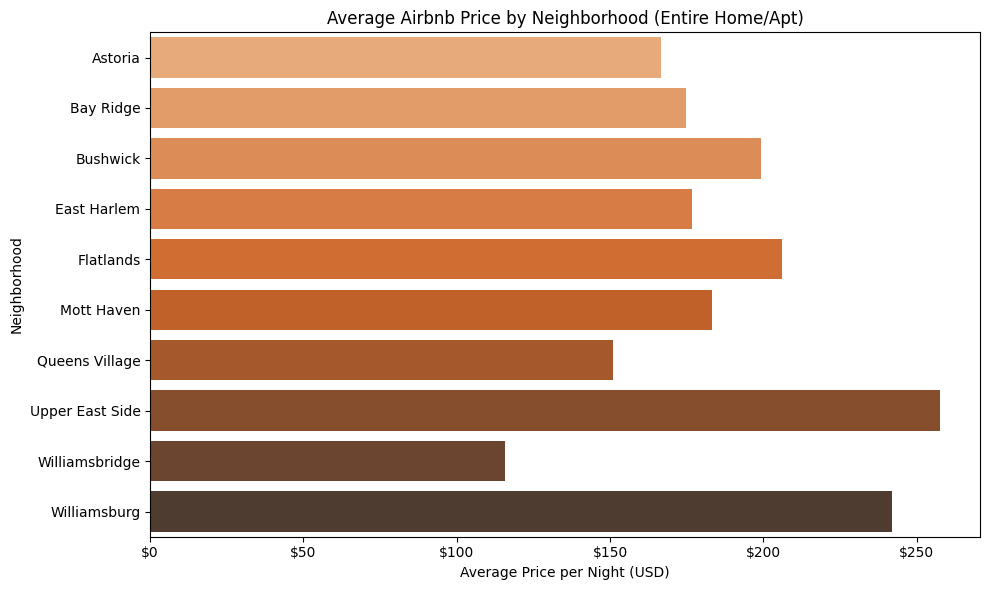

In [ ]:
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Plot using seaborn
avg_prices = home_nyc.groupby('neighbourhood')['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_prices, x='price', y='neighbourhood', palette='Oranges_d')

plt.title('Average Airbnb Price by Neighborhood (Entire Home/Apt)')
plt.xlabel('Average Price per Night (USD)')
plt.ylabel('Neighborhood')

# Format x-axis as dollars
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"${x:,.0f}"))

plt.tight_layout()
plt.show()


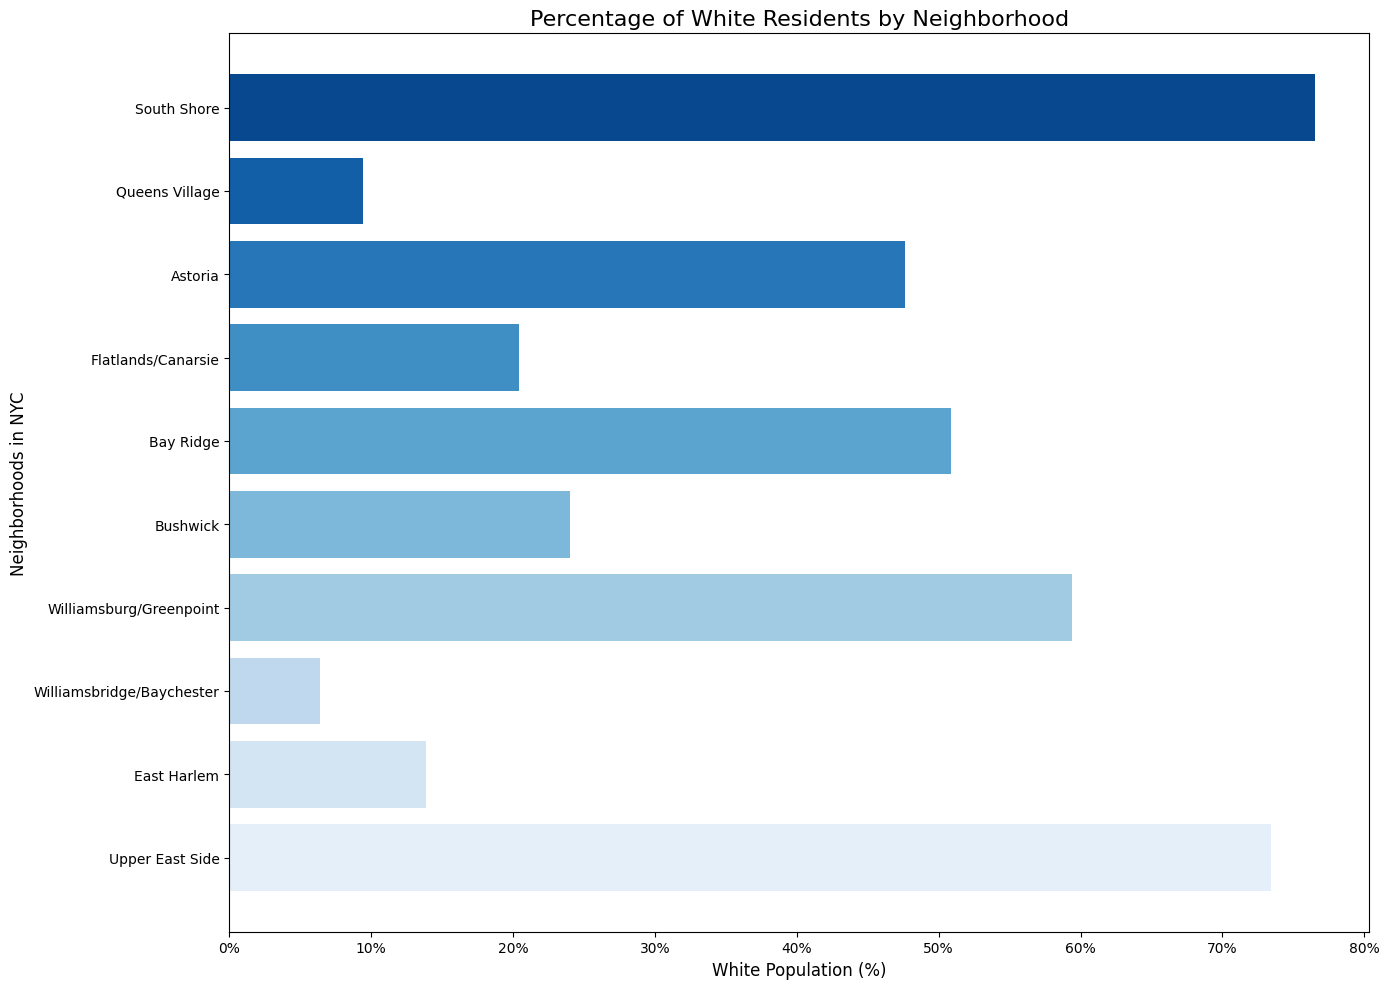

In [ ]:
# Step 1: Strip % and convert to float
nyc_dem['pop_race_white_pct'] = nyc_dem['pop_race_white_pct'].str.replace('%', '').astype(float)

# Step 2: If needed, scale values to 0–100 range
if nyc_dem['pop_race_white_pct'].max() <= 1:
    nyc_dem['pop_race_white_pct'] *= 100

# Step 3: Plot
plt.figure(figsize=(14, 10))
bars = plt.barh(
    nyc_dem['region_name'],
    nyc_dem['pop_race_white_pct'],
    color=sns.color_palette("Blues", len(nyc_dem))
)

plt.title('Percentage of White Residents by Neighborhood', fontsize=16)
plt.xlabel('White Population (%)', fontsize=12)
plt.ylabel('Neighborhoods in NYC', fontsize=12)

# Format x-axis as percentage
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.0f}%"))

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


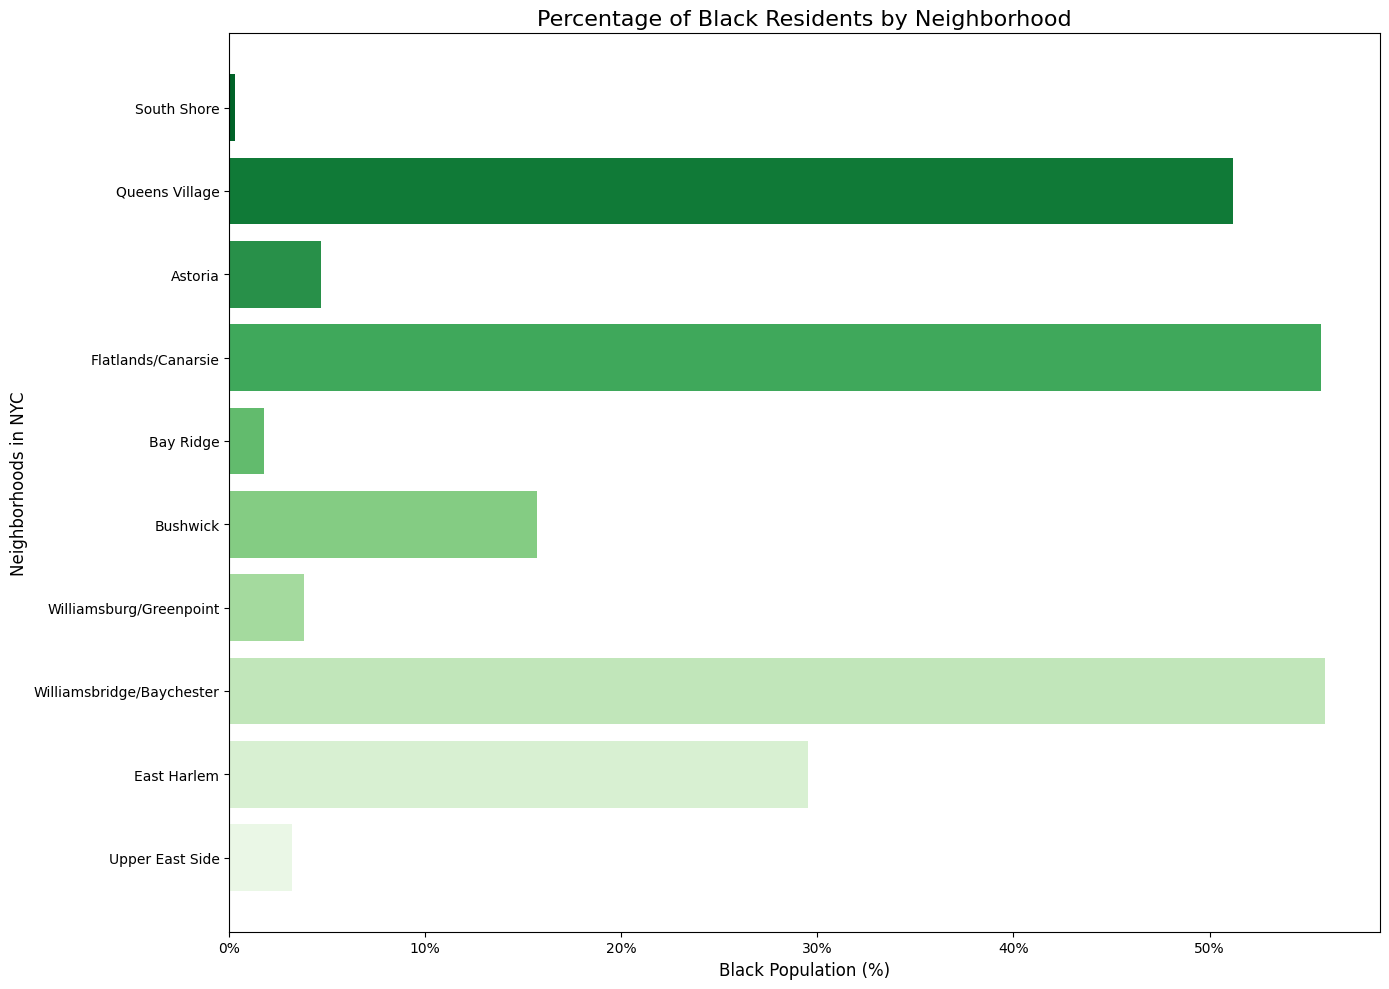

In [ ]:
# Step 1: Convert values to float, stripping any % symbols if present
nyc_dem['pop_race_black_pct'] = nyc_dem['pop_race_black_pct'].str.replace('%', '').astype(float)

# Step 2: Scale to 0–100 if needed
if nyc_dem['pop_race_black_pct'].max() <= 1:
    nyc_dem['pop_race_black_pct'] *= 100

# Step 3: Plot
plt.figure(figsize=(14, 10))
bars = plt.barh(
    nyc_dem['region_name'],
    nyc_dem['pop_race_black_pct'],
    color=sns.color_palette("Greens", len(nyc_dem))
)

plt.title('Percentage of Black Residents by Neighborhood', fontsize=16)
plt.xlabel('Black Population (%)', fontsize=12)
plt.ylabel('Neighborhoods in NYC', fontsize=12)

# Format x-axis ticks as percentages
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.0f}%"))

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


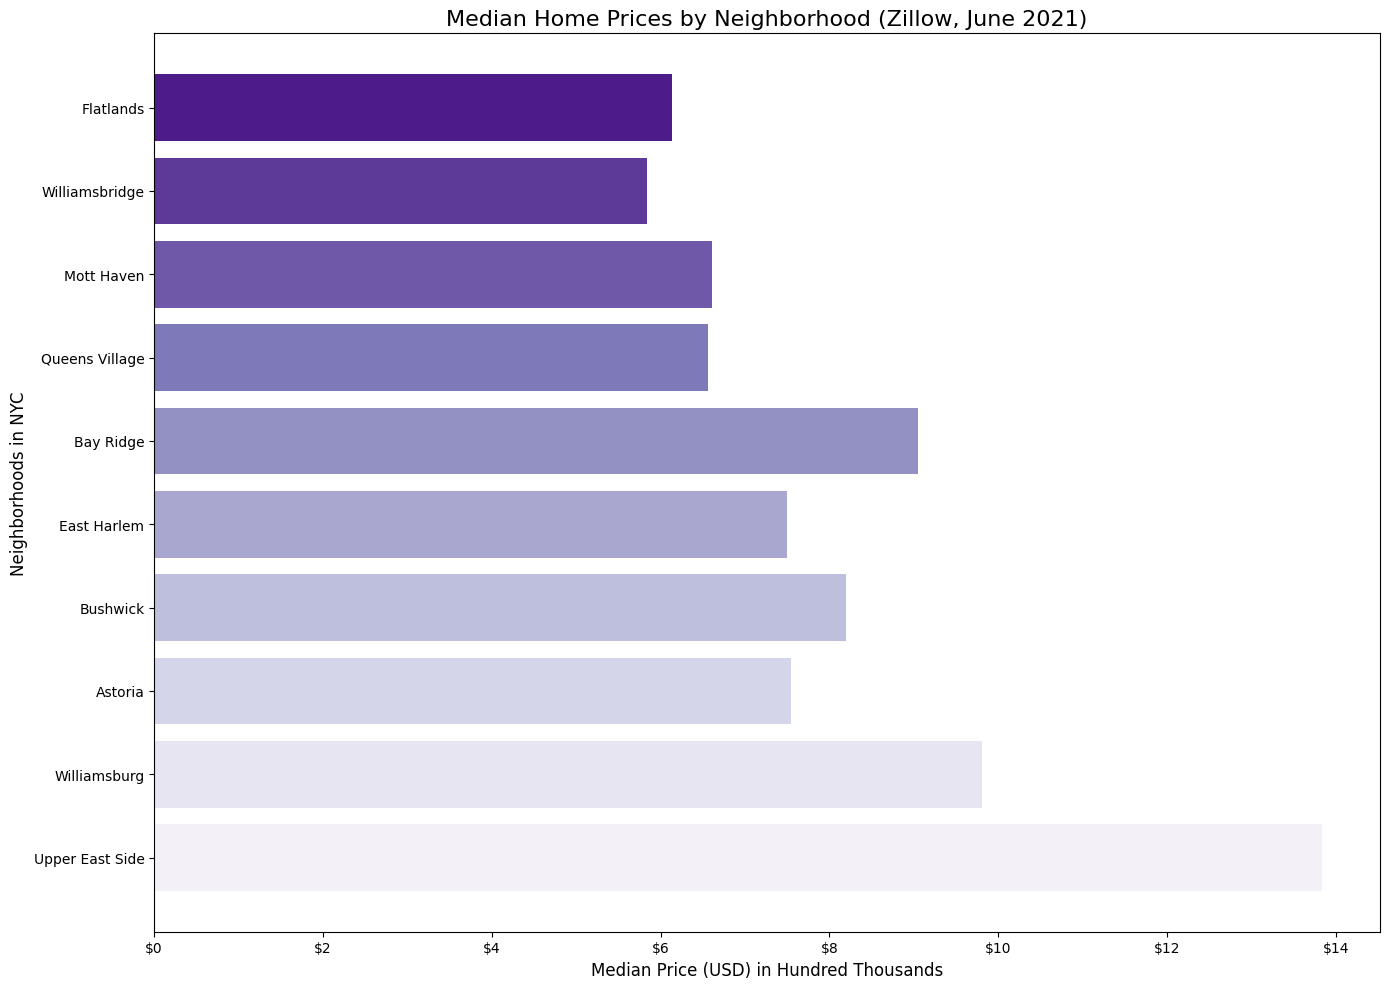

In [ ]:
# Step 1: Convert to float if necessary (in case they're strings)
zillow_values['Median Prices (6/30/2021)'] = pd.to_numeric(
    zillow_values['Median Prices (6/30/2021)'], errors='coerce'
)

# Step 2: Plot
plt.figure(figsize=(14, 10))
bars = plt.barh(
    zillow_values['RegionName'],
    zillow_values['Median Prices (6/30/2021)'],
    color=sns.color_palette("Purples", len(zillow_values))
)

plt.title('Median Home Prices by Neighborhood (Zillow, June 2021)', fontsize=16)
plt.xlabel('Median Price (USD) in Hundred Thousands', fontsize=12)
plt.ylabel('Neighborhoods in NYC', fontsize=12)

# Format x-axis as currency
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"${x:,.0f}"))

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()
